In [1]:
from acoular import *
from os import path
from acoular import __file__ as bpath
import matplotlib.pyplot as plt

In [2]:
micgeofile = path.join(path.split(bpath)[0], 'xml', 'array_64.xml')

In [3]:
SFREQ = 51200
TIME = 1
NUM_SAMPLES = TIME * SFREQ
BLOCK_SIZE = 1024
MICGEOM = MicGeom(from_file=micgeofile) 

In [4]:
# create 
h5savefile = 'Test_dat.h5'
n = WNoiseGenerator(sample_freq=SFREQ, numsamples=NUM_SAMPLES, seed=0)
p = PointSource(signal=n, mics=MICGEOM, loc=(0.5,0.0,0.75))
wh5 = WriteH5(source=p, name=h5savefile)
wh5.save()

In [33]:
#define boundry for positional and source strenght variation
GRID_BOUNDS = [(-1, 1), (-1, 1), (0.75, 0.75), (0, 1)]
PG = create_rand_pgrid(GRID_BOUNDS, 1) 
GR = RectGrid(x_min=-1,x_max=1, y_min=-1, y_max=1, z=0.75,increment=0.1)
SV_EA = SteeringVector(mics=MICGEOM, ref=1.0) # defenition of the steering vector
SV = SteeringVector(grid=GR, mics=MICGEOM, ref=1.0) # defenition of the steering vector

In [34]:
ts = TimeSamples(name='Test_dat.h5', sample_freq=SFREQ)
ps = PowerSpectra(time_data=ts, block_size=BLOCK_SIZE, window='Hanning')
bea = BeamformerEA(steer = SV_EA, freq_data=ps)

In [35]:
res_BEA = bea.calculate(GRID_BOUNDS, 800)

[('Test_dat_cache.h5', 2)]


In [20]:
res_BEA

     fun: 1.7352363151408126e-07
 message: 'Optimization terminated successfully.'
    nfev: 2295
     nit: 37
 success: True
       x: array([ 4.99374618e-01, -4.77978887e-05,  7.50000000e-01,  2.64199918e-03])

In [23]:
type(res_BEA.x)

numpy.ndarray

In [18]:
bea.sol[:,-1]

array([ 4.99374618e-01, -4.77978887e-05,  7.50000000e-01,  2.64200918e-03])

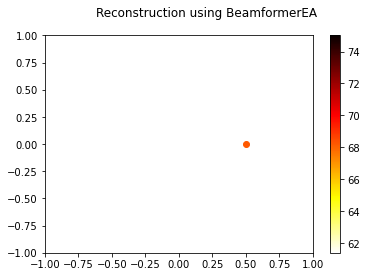

In [8]:
plt.figure()
plt.scatter(res_BEA.x[0],res_BEA.x[1],c=L_p(res_BEA.x[3]),cmap= 'hot_r')
plt.suptitle("Reconstruction using BeamformerEA")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.colorbar()

In [9]:
L_p(res_BEA.x[3])

68.19853514156816

In [10]:
#define boundry for positional and source strenght variation
GRID_BOUNDS = [(-1, 1), (-1, 1), (0.75, 0.75), (0, 1)]
PG = create_rand_pgrid(GRID_BOUNDS, 1) 
GR = RectGrid(x_min=-1,x_max=1, y_min=-1, y_max=1, z=0.75,increment=0.1)
SV_EA = SteeringVector(grid=PG, mics=MICGEOM, ref=1.0) # defenition of the steering vector
SV = SteeringVector(grid=GR, mics=MICGEOM, ref=1.0) # defenition of the steering vector

In [64]:
SV = SteeringVector(grid=GR, mics=MICGEOM) # defenition of the steering vector
beb = BeamformerBase(freq_data=ps,steer=SV)
#beb = BeamformerBase(freq_data=ps,grid=GR, mpos=MICGEOM)
## weird behaeviour BeamformerBase gives different result with depracted grid and mpos traits 
## and when using SteeringVector
res_BEB = beb.synthetic(800,0)

[('Test_dat_cache.h5', 30)]


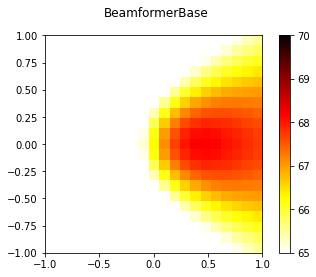

In [65]:
im = plt.imshow(L_p(res_BEB.T),vmax=70,vmin=65,extent=GR.extend(),cmap= 'hot_r')
plt.suptitle("BeamformerBase")
plt.colorbar()

In [58]:
#becmf = BeamformerCMF(freq_data=ps,grid=GR, mpos=MICGEOM)
becmf = BeamformerCMF(freq_data=ps,steer=SV)

res_CMF = becmf.synthetic(800,0)

[('Test_dat_cache.h5', 27)]


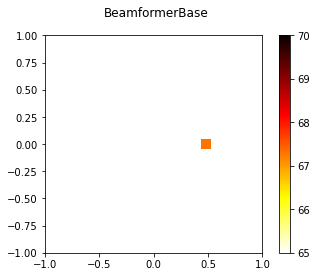

In [59]:
im = plt.imshow(L_p(res_CMF.T),vmax=70,vmin=65,extent=GR.extend(),cmap= 'hot_r')
plt.suptitle("BeamformerBase")

plt.colorbar()